In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

# Exploratory Data Analysis

In [18]:
data=pd.read_csv("Housing_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [19]:
data.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [20]:
data.describe()

Price   LivingArea    Bathrooms     Bedrooms      LotSize  \
count    1047.000000  1047.000000  1047.000000  1047.000000  1047.000000   
mean   163862.125119  1807.302770     1.918338     3.183381     0.569580   
std     67651.558917   641.460916     0.641735     0.750265     0.777879   
min     16858.000000   672.000000     1.000000     1.000000     0.000000   
25%    112014.000000  1336.000000     1.500000     3.000000     0.210000   
50%    151917.000000  1672.000000     2.000000     3.000000     0.390000   
75%    205235.000000  2206.000000     2.500000     4.000000     0.600000   
max    446436.000000  4534.000000     4.500000     6.000000     9.000000   

               Age    Fireplace  
count  1047.000000  1047.000000  
mean     28.061127     0.593123  
std      34.900899     0.491486  
min       0.000000     0.000000  
25%       6.000000     0.000000  
50%      18.000000     1.000000  
75%      34.000000     1.000000  
max     247.000000     1.000000

# Visualisations
Scatter plots: LivingArea vs Price, Bathrooms vs Price.

Box plots: Bedrooms, Fireplace vs Price.

Histograms: distribution of LotSize, Age.

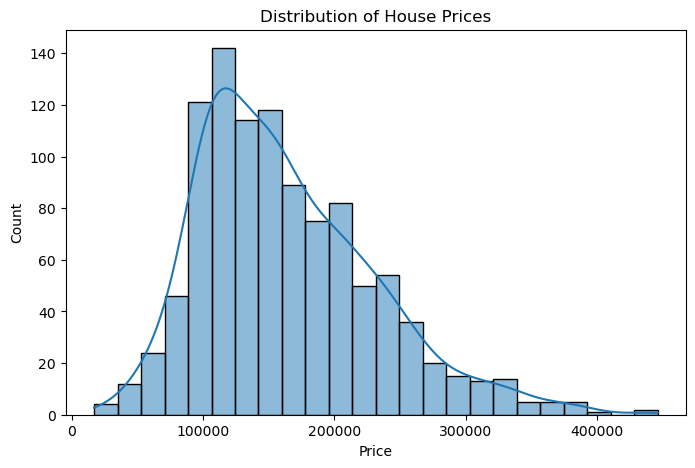

In [21]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

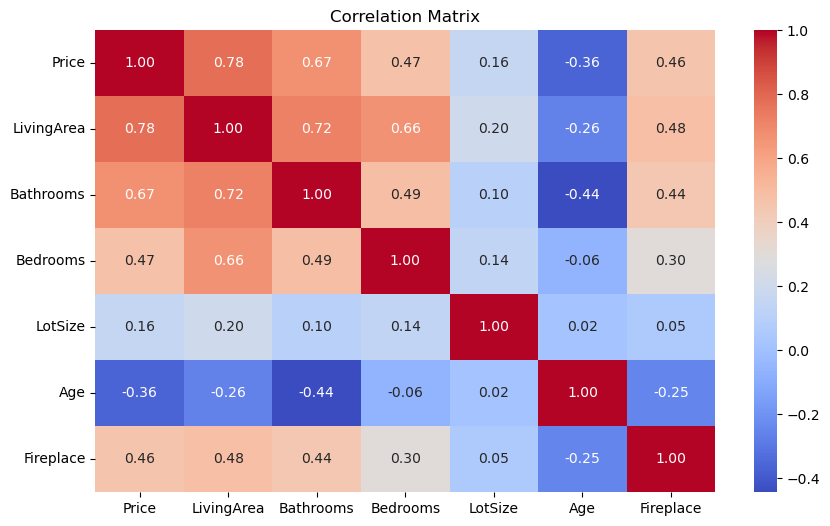

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

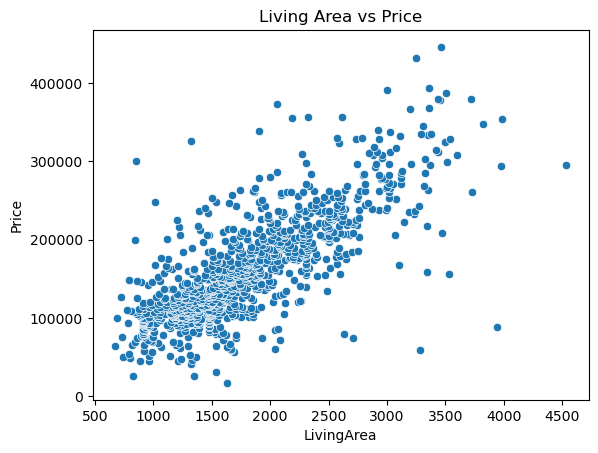

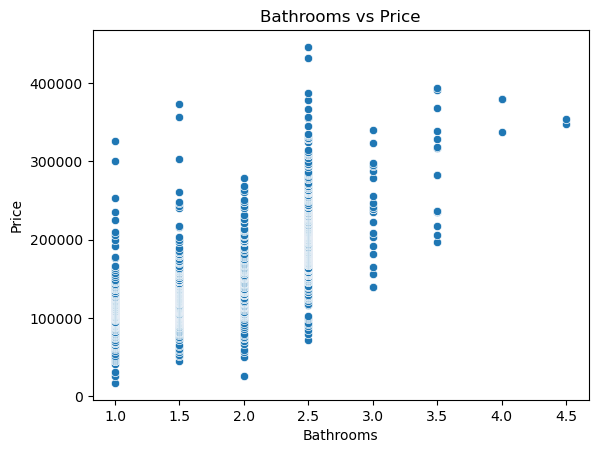

In [23]:
# Scatter plots
sns.scatterplot(data=data, x='LivingArea', y='Price')
plt.title("Living Area vs Price")
plt.show()

sns.scatterplot(data=data, x='Bathrooms', y='Price')
plt.title("Bathrooms vs Price")
plt.show()

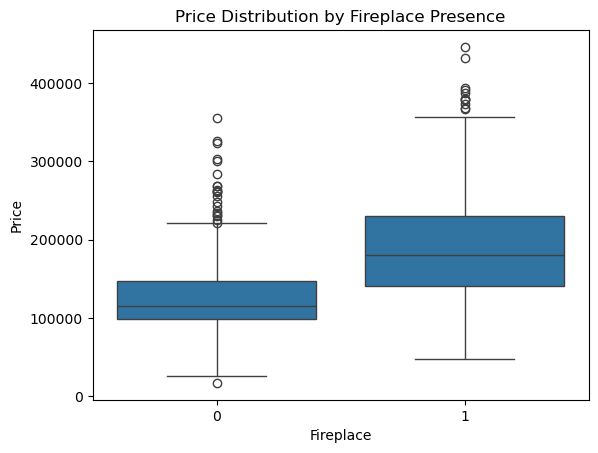

In [24]:
# Boxplot - Fireplace vs Price
sns.boxplot(x='Fireplace', y='Price', data=data)
plt.title("Price Distribution by Fireplace Presence")
plt.show()

# Feature Engineering

In [25]:
# 1. Define features (X) and target (y)
X=data.drop("Price",axis=1)
y=data["Price"]

# 2. Train-test split (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
print(X,y)

      LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0           1629        1.0         3     0.76  180          0
1           1344        2.0         3     0.92   13          0
2            822        1.0         2     0.56  173          0
3           1540        1.0         2     0.04  115          0
4           1320        1.0         3     0.17   90          0
...          ...        ...       ...      ...  ...        ...
1042        3504        2.5         5     0.90    0          1
1043        3003        3.5         4     0.46   88          1
1044        3361        3.5         4     0.71    1          1
1045        3250        2.5         3     0.53   23          1
1046        3467        2.5         4     0.34    3          1

[1047 rows x 6 columns] 0        16858
1        26049
2        26130
3        31113
4        40932
         ...  
1042    387652
1043    391842
1044    394532
1045    432845
1046    446436
Name: Price, Length: 1047, dtype: int64


# Modeling

## 1.Linear Regression model

In [28]:
# Train the Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred=model.predict(X_test)

# Evaluate the model
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

# Print metrics
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² Score: 0.71
RMSE: 36497.73
MAE: 26675.96


## Random Forest Regression Model

In [30]:
# Initialize and train Random Forest
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

# Make predictions
rf_pred=rf_model.predict(X_test)

# Evaluate the model
rf_mse=mean_squared_error(y_test,rf_pred)
rf_rmse=np.sqrt(rf_mse)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)

# Print performance
print(f"Random Forest R² Score:{rf_r2:.2f}")
print(f"Random Forest RMSE:{rf_rmse:.2f}")
print(f"Random Forest MAE:{rf_mae:.2f}")

Random Forest R² Score:0.68
Random Forest RMSE:38463.13
Random Forest MAE:26451.39


## GridSearchCV

In [33]:
param_grid={
    'n_estimators':[100,200],
    'max_depth': [None,10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}

grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=5,scoring='r2',n_jobs=-1)
grid.fit(X_train,y_train)

print("Best R² Score:",grid.best_score_)
print("Best Parameters:",grid.best_params_)

Best R² Score: 0.6169052868082326
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


## Saving and Deploying

In [34]:
import joblib

# Save model
joblib.dump(rf_model,'random_forest_model.pkl')

['random_forest_model.pkl']